# Faktor Apakah yang Menjual Sebuah Mobil?


Anda adalah seorang analis di Crankshaft List. Ratusan iklan kendaraan gratis ditayangkan di situs web Anda setiap hari. Anda perlu mempelajari kumpulan data selama beberapa tahun terakhir dan menentukan faktor-faktor yang memengaruhi harga sebuah kendaraan. Tujuan dari proyek ini yaitu untuk mengetahui apa saja faktor yang mempengaruhi harga dari kendaraan melalui eksplorasi data analisis dan visualisasi data.

# Pra-pemrosesan

## Mengeksplorasi Data Awal

In [1]:
import pandas as pd
df = pd.read_csv('/datasets/vehicles_us.csv')

In [3]:
# tampilkan informasi/rangkuman umum tentang DataFrame
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [4]:
# tampilkan sampel data
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


* Kolom `model_year` akan lebih baik diubah tipe datanya menjadi int

* Kolom `date_posted` seharusnya memiliki tipe data berupa datetime

* Kolom `condition` lebih baik diubah dalam bentuk skala numerik 

In [5]:
df.isna().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

Dari informasi umum diketahui bahwa terdapat nilai yang hilang pada kolom `model_year`, `cylinders`, `odometer`, `paint_color`, dan `is_4wd` dengan jumlah yang berbeda-beda. Hal ini perlu diselidiki lebih lanjut.

Selanjutnya kita akan melihat apakah terdapat data yang terduplikasi

In [6]:
df.duplicated().sum()

0

Ternyata tidak ada data yang terduplikasi. Selanjutnya kita akan melihat distribusi dataset

In [7]:
df.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


Dari distribusi data di atas, terdapat nilai yang tidak logis di kolom `price` dengan nilai 1 dollar.

**Dari eksplorasi data awal diperoleh bahwa:**

* Kolom `model_year` akan lebih baik diubah tipe datanya menjadi int

* Kolom `date_posted` seharusnya memiliki tipe data berupa datetime

* Kolom `condition` lebih baik diubah dalam bentuk skala numerik 

* Kolom `is_4wd` yang seharusnya bertipe boolean

* Terdapat nilai yang hilang pada kolom `model_year`, `cylinders`, `odometer`, `paint_color`, dan `is_4wd` dengan jumlah yang berbeda-beda

* Terdapat nilai yang tidak logis di kolom `price` dengan nilai 1 yang harus diselidiki lebih lanjut.

## Mengatasi Nilai-Nilai yang Hilang 

In [8]:
#menghitung presentase nilai hilang di setiap kolom
(df.isna().sum().sort_values(ascending=False)/df.shape[0]) * 100

is_4wd          50.369723
paint_color     17.985444
odometer        15.316836
cylinders       10.208637
model_year       7.023775
price            0.000000
model            0.000000
condition        0.000000
fuel             0.000000
transmission     0.000000
type             0.000000
date_posted      0.000000
days_listed      0.000000
dtype: float64

Selanjutnya, kita akan menyelidiki nilai yang hilang pada kolom `is_4wd`. 

In [9]:
df[df['is_4wd'].isna()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
11,8990,2012.0,honda accord,excellent,4.0,gas,111142.0,automatic,sedan,grey,NaN,2019-03-28,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,NaN,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,NaN,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,NaN,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,NaN,2018-07-02,71


In [10]:
df.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


In [11]:
df['is_4wd'].unique()

array([ 1., nan])

`is_4wd` merupakan kolom yang menjelaskan apakah kendaraan tersebut memiliki penggerak 4 roda atau tidak. Terdapat 2 nilai unik yaitu 1 dan nan. Kemungkinan bahwa informasi yang ada di kolom ini merupakan nilai benar/salah yang diwakilkan dengan 1 = benar dan 0 = salah. 


In [12]:
#mengganti nilai nan dengan 0
df['is_4wd'] = df['is_4wd'].fillna(0)
df['is_4wd']

0        1.0
1        1.0
2        0.0
3        0.0
4        0.0
        ... 
51520    0.0
51521    0.0
51522    0.0
51523    0.0
51524    0.0
Name: is_4wd, Length: 51525, dtype: float64

Selanjutnya kita akan memeriksa nilai kosong di kolom `paint_color`

In [13]:
df[df['paint_color'].isna()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,0.0,2019-03-22,9
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
12,18990,2012.0,ram 1500,excellent,8.0,gas,140742.0,automatic,pickup,NaN,1.0,2019-04-02,37
21,5250,2007.0,toyota rav4,good,6.0,gas,154000.0,automatic,SUV,NaN,0.0,2018-08-22,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51502,7995,2011.0,chevrolet equinox,like new,4.0,gas,111088.0,automatic,SUV,NaN,0.0,2019-04-01,175
51503,6595,2011.0,chevrolet malibu,excellent,4.0,gas,100780.0,automatic,sedan,NaN,0.0,2019-02-27,73
51506,28900,2017.0,ford f150 supercrew cab xlt,good,6.0,gas,49225.0,automatic,pickup,NaN,1.0,2019-04-11,25
51519,11750,2015.0,honda accord,excellent,4.0,gas,NaN,automatic,coupe,NaN,0.0,2018-11-24,89


Untuk mengisi nilai yang hilang pada kolom `paint_color`, kita akan mengisinya dengan mengelompokkan warna berdasarkan tipe kendaraan.

In [14]:
paint = df.groupby('type')['paint_color'].agg(pd.Series.mode).to_dict()
df['paint_color'] = df.apply(lambda x: paint[x['type']] if x['paint_color'] !=x['paint_color'] else x['paint_color'], axis=1)

selanjutnya kita akan memeriksa nilai yang hilang pada kolom `model_year` dan `cylinder`. Kedua kolom ini dapat dipengaruhi oleh model mobil yang dirilis pada tahun tertentu.

In [15]:
#grouped_by_model = df.grouby('model').agg({'model_year' : 'median', 'cylinders' : 'median'})
grouped_model_year = df.groupby('model').agg({'model_year': 'median', 'cylinders': 'median'})
grouped_model_year

,model_year,cylinders
model,,
acura tl,2007.0,6.0
bmw x5,2010.0,6.0
buick enclave,2012.0,6.0
cadillac escalade,2009.0,8.0
chevrolet camaro,2013.0,6.0
...,...,...
toyota sienna,2008.0,6.0
toyota tacoma,2010.0,6.0
toyota tundra,2009.0,8.0


In [16]:
df1 = df.copy()
for model in df1['model'].unique():
    df1.loc[(df1['model'] == model) & (df1['model_year'].isna()), 'model_year'] = \
        grouped_model_year.loc[grouped_model_year.index == model, 'model_year'][0]

In [17]:
for model in df1['model'].unique():
    df1.loc[(df1['model'] == model) & (df1['cylinders'].isna()), 'cylinders'] = \
        grouped_model_year.loc[grouped_model_year.index == model, 'cylinders'][0]

In [18]:
df1.isna().sum()

price              0
model_year         0
model              0
condition          0
cylinders          0
fuel               0
odometer        7892
transmission       0
type               0
paint_color        0
is_4wd             0
date_posted        0
days_listed        0
dtype: int64

Selanjutnya kita akan memeriksa nilai yang hilang di kolom `odometer`.

In [19]:
df['odometer'].describe()

count     43633.000000
mean     115553.461738
std       65094.611341
min           0.000000
25%       70000.000000
50%      113000.000000
75%      155000.000000
max      990000.000000
Name: odometer, dtype: float64

dari distribusi dataset di atas terlihat bahwa rentang nilai minimum dan maksimumnya cukup jauh yang kemungkinan disebabkan adanya outlier. Oleh karena itu nilai yang hilang pada kolom `odometer` akan diganti dengan nilai mediannya.

In [20]:
groupby_condition = df1.groupby('condition').agg({'odometer': 'median'})
groupby_condition

,odometer
condition,
excellent,104230.0
fair,181613.0
good,129000.0
like new,72982.5
new,8002.0
salvage,142673.5


In [21]:
for condition in df1['condition'].unique():
    df1.loc[(df1['condition'] == condition) & (df1['odometer'].isna()), 'odometer'] = \
        groupby_condition.loc[groupby_condition.index == condition, 'odometer'][0]

In [22]:
df1.isna().sum()

price           0
model_year      0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
type            0
paint_color     0
is_4wd          0
date_posted     0
days_listed     0
dtype: int64

`cylinder` dapat dipengaruhi dari model kendaraannya, oleh karena itu kita akan mengisi nilai yang hilang dalam `cylinder` berdasarkan model

## Memperbaiki Tipe Data

In [23]:
df1['is_4wd'].describe()

count    51525.000000
mean         0.496303
std          0.499991
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: is_4wd, dtype: float64

Karena data dalam kolom `model_year` masih dalam tipe float, kita akan mengubahnya dalam bentuk integer.

In [24]:
df1['model_year'] = df1['model_year'].astype(int)

Karena data dalam kolom `is_4wd` masih dalam tipe float, kita akan mengubahnya dalam bentuk boolean.

In [25]:
df1['is_4wd'] = df1['is_4wd'].astype(bool)

Selanjutnya kita akan membuat pengkategorian untuk kolom dengan angka agar untuk memudahkan pengolahan data

In [26]:
# Mungkin membantu untuk mengganti nilai pada kolom 'condition' dengan sesuatu yang dapat dimanipulasi dengan lebih mudah 
def categorize_condition(condition):
    if condition == 'salvage':
        return 0
    elif condition == 'fair':
        return 1
    elif condition == 'good':
        return 2
    elif condition == 'excellent':
        return 3
    elif condition == 'like new':
        return 4
    else:
        return 5
    

In [27]:
categorize_condition('new')

5

In [28]:
df1['condition'] = df1['condition'].apply(categorize_condition)

In [29]:
df1['condition'].value_counts()

3    24773
2    20145
4     4742
1     1607
5      143
0      115
Name: condition, dtype: int64

Selanjutnya kita akan mengubah format data `date_posted` ke datetime  

In [30]:
df1['date_posted'] = pd.to_datetime(df1['date_posted'], format='%Y-%m-%d')

In [31]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51525 non-null  int64         
 2   model         51525 non-null  object        
 3   condition     51525 non-null  int64         
 4   cylinders     51525 non-null  float64       
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  float64       
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   51525 non-null  object        
 10  is_4wd        51525 non-null  bool          
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
dtypes: bool(1), datetime64[ns](1), float64(2), int64(4), object(5)
memory usage: 4.8+ MB


## Memperbaiki Kualitas Data

Kita akan menambahkan kolom baru, yaitu kolom bulan, tanggal, dan tahun saat iklan ditayangkan

In [32]:
df1['day'] = df1['date_posted'].dt.day_name()
df1['month'] = df1['date_posted'].dt.month_name()
df1['year'] = df1['date_posted'].dt.year

In [33]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51525 non-null  int64         
 2   model         51525 non-null  object        
 3   condition     51525 non-null  int64         
 4   cylinders     51525 non-null  float64       
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  float64       
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   51525 non-null  object        
 10  is_4wd        51525 non-null  bool          
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
 13  day           51525 non-null  object        
 14  month         51525 non-null  object        
 15  year          51525 non-null  int64 

Kemudian kita juga akan menambahkan kolom usia kendaraan saat iklan ditayangkan dengan mengurangi kolom tahun diposting (year) dengan tahun model kendaraan tersebut dikeluarkan (model_year)

In [34]:
df1['car_age'] = (df1['year'] + 1) - df1['model_year']

In [35]:
df1.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day,month,year,car_age
0,9400,2011,bmw x5,2,6.0,gas,145000.0,automatic,SUV,black,True,2018-06-23,19,Saturday,June,2018,8
1,25500,2011,ford f-150,2,6.0,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,Friday,October,2018,8
2,5500,2013,hyundai sonata,4,4.0,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,Thursday,February,2019,7
3,1500,2003,ford f-150,1,8.0,gas,181613.0,automatic,pickup,white,False,2019-03-22,9,Friday,March,2019,17
4,14900,2017,chrysler 200,3,4.0,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,Tuesday,April,2019,3


Selanjutnya, kita akan membuat kolom jarak tempuh rata-rata kendaraan per tahun dengan cara membagi nilai odometer dengan usia kendaraan 

In [36]:
df1['avg_mileage'] = df1['odometer'] / df1['car_age']

# Analisis Data Eksploratif

## Memeriksa Data yang Sudah Bersih

In [37]:
# tampilkan informasi/rangkuman umum tentang DataFrame
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51525 non-null  int64         
 2   model         51525 non-null  object        
 3   condition     51525 non-null  int64         
 4   cylinders     51525 non-null  float64       
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  float64       
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   51525 non-null  object        
 10  is_4wd        51525 non-null  bool          
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
 13  day           51525 non-null  object        
 14  month         51525 non-null  object        
 15  year          51525 non-null  int64 

In [38]:
# tampilkan sampel data 
df1.sample(5)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day,month,year,car_age,avg_mileage
8547,6500,2010,nissan maxima,2,6.0,gas,145941.0,automatic,sedan,black,False,2018-05-01,35,Tuesday,May,2018,9,16215.666667
43531,28000,2015,toyota tundra,2,8.0,gas,120000.0,automatic,pickup,white,True,2018-12-15,33,Saturday,December,2018,4,30000.000000
18323,2800,2008,chevrolet silverado,2,8.0,gas,112000.0,automatic,truck,blue,False,2019-03-15,103,Friday,March,2019,12,9333.333333
18574,7990,2003,gmc sierra 2500hd,3,8.0,gas,149471.0,automatic,truck,black,True,2018-09-30,47,Sunday,September,2018,16,9341.937500
40537,20990,2014,ram 2500,2,8.0,gas,129000.0,automatic,truck,white,True,2019-03-13,6,Wednesday,March,2019,6,21500.000000


## Mempelajari Parameter Inti 

Parameternya adalah :
* Harga
* Usia kendaraan ketika iklan ditayangkan
* Jarak tempuh
* Jumlah silinder 
* Kondisi

In [39]:
#import matplotlib untuk visualisasi
import matplotlib.pyplot as plt

In [40]:
df1[['price','condition','car_age','avg_mileage','cylinders']].describe()

,price,condition,car_age,avg_mileage,cylinders
count,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000
mean,12132.464920,2.637535,9.513906,15378.482765,6.121067
std,10040.803015,0.712447,6.112976,11808.757090,1.657457
min,1.000000,0.000000,1.000000,0.000000,3.000000
25%,5000.000000,2.000000,5.000000,9363.636364,4.000000
50%,9000.000000,3.000000,9.000000,13036.181818,6.000000
75%,16839.000000,3.000000,13.000000,18222.222222,8.000000
max,375000.000000,5.000000,111.000000,373200.000000,12.000000


Kolom `price`, `avg_mileage`, dan `car_age` dapat ditampilkan dengan histogram dan boxplot karena merupakan variabel kuantitatif berisi nilai numerik dan bisa dilakukan operasi aritmatika.

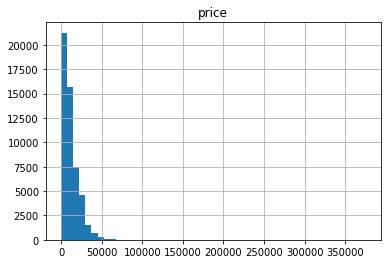

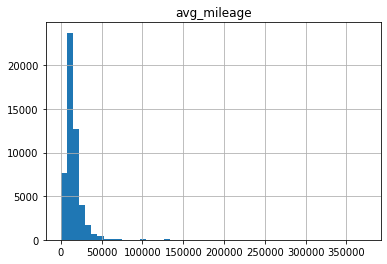

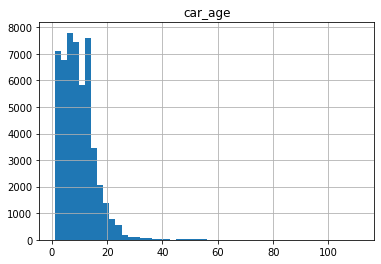

In [41]:
#histogram 
quantitative_value = ['price','avg_mileage','car_age']

for i in quantitative_value:
    df1.hist([i],bins=50)
    plt.show()

* Dari histogram `price` terlihat bahwa terdapat lonjakan di angka 0. Hal ini juga terlihat di tabel statistika deskriptif di atas bahwa nilai minimum pada kolom `price` yaitu 1, dimana hal tersebut tidak mungkin. Kemungkinan hal ini disebabkan oleh kesalahan pada penginputan data

* Untuk histogram `avg_mileage` dan `car_age` tidak masalah jika terdapat nilai 0 karena hal ini menandakan kendaraan tersebut masih baru. 


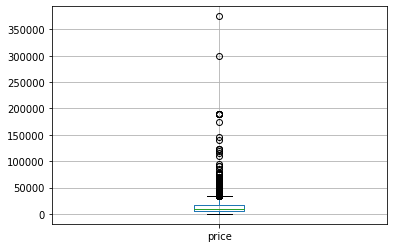

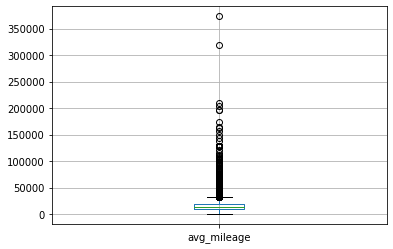

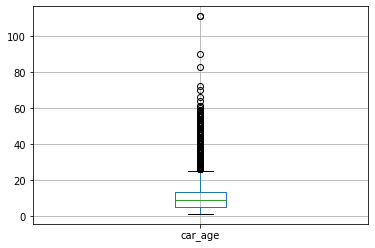

In [42]:
#boxplot 
quantitative_value = ['price','avg_mileage','car_age']

for i in quantitative_value:
    df1.boxplot([i])
    plt.show()



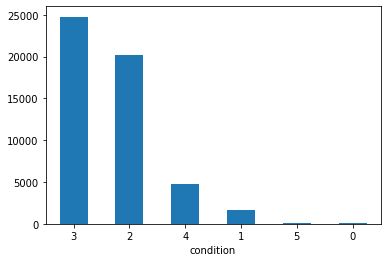

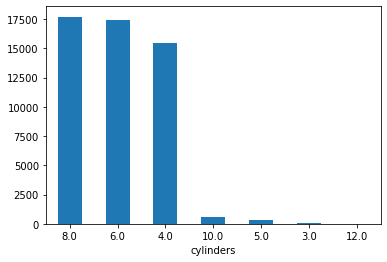

In [43]:
#condition dan cylinder    
nonquantitative_value = ['condition','cylinders']

for i in nonquantitative_value:
    df1[i].value_counts().plot(kind='bar')
    plt.xlabel(i)
    plt.xticks(rotation = 0)
    plt.show()

* Kondisi kendaraan yang paling banyak diiklankan yaitu `condition` 3 (keadaan excellent)

* `cylinder` yang paling banyak digunakan yaitu 8 cylinder

## Mempelajari dan Menangani Outlier

Untuk mengetahui apakah suatu data tersebut merupakan sebuah outlier, kita harus mengetahui batas atas dan batas bawah dari persebaran datanya.

In [45]:
def boundaries(i):
    Q1 = df1[i].quantile(0.25)
    Q3 = df1[i].quantile(0.75)
    IQR = Q3 - Q1
    W = 1.5*IQR
    lower_bound = Q1 - W
    upper_bound = Q3 + W
    return lower_bound, upper_bound

In [46]:
for i in quantitative_value:
    lower_bound, upper_bound = boundaries(i)
    print('Batas bawah pada', i, 'adalah' , lower_bound)
    print('Batas atas pada', i, 'adalah', upper_bound)

Batas bawah pada price adalah -12758.5
Batas atas pada price adalah 34597.5
Batas bawah pada avg_mileage adalah -3924.242424242424
Batas atas pada avg_mileage adalah 31510.10101010101
Batas bawah pada car_age adalah -7.0
Batas atas pada car_age adalah 25.0


Selanjutnya kita akan membuat dataframe baru tanpa outlier menggunakan batas atas dan bawah yang telah diperoleh sebelumnya.

In [47]:
df2 = df1.copy()

for i in quantitative_value:
    lower_bound, upper_bound = boundaries(i)
    df2 = df2[(df2[i] > lower_bound) & (df2[i] < upper_bound)]

In [48]:
df2.describe()

,price,model_year,condition,cylinders,odometer,days_listed,year,car_age,avg_mileage
count,46404.000000,46404.000000,46404.000000,46404.000000,46404.000000,46404.000000,46404.000000,46404.000000,46404.000000
mean,10857.764115,2009.670093,2.621412,6.069240,116647.117156,39.554069,2018.314563,9.644470,13515.550399
std,7663.094456,4.921149,0.702758,1.650799,58124.278395,28.217267,0.464347,4.924542,6091.985988
min,1.000000,1995.000000,0.000000,3.000000,0.000000,0.000000,2018.000000,1.000000,0.000000
25%,4995.000000,2006.000000,2.000000,4.000000,79197.750000,19.000000,2018.000000,6.000000,9344.925000
50%,8700.000000,2010.000000,3.000000,6.000000,113419.000000,33.000000,2018.000000,9.000000,12875.000000
75%,14999.000000,2013.000000,3.000000,8.000000,150000.000000,53.000000,2019.000000,13.000000,17175.178571
max,34595.000000,2019.000000,5.000000,12.000000,527835.000000,271.000000,2019.000000,24.000000,31505.750000


In [49]:
df2.price.describe()

count    46404.000000
mean     10857.764115
std       7663.094456
min          1.000000
25%       4995.000000
50%       8700.000000
75%      14999.000000
max      34595.000000
Name: price, dtype: float64

Dari hasil di atas dapat terlihat bahwa kolom `price` masih memiliki nilai minimum yang terlalu kecil (terlalu murah) untuk ukuran harga kendaraan. Kita akan mengiris data yang terlalu kecil dan menyimpan data yang sudah tidak mengandung nilai yang terlalu kecil dalam dataframe baru

In [50]:
print(df2['price'].quantile(0.01))

1.0


In [51]:
print(df2['price'].quantile(0.02))

500.0


Karena quantile 0.01 memiliki nilai 1, maka akan digunakan quantile 0.02 yaitu 500 sebagai batas untuk dilakukan pengirisan data. 

In [52]:
cheap_price = 500
df2 = df2.query('price >= @cheap_price')
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45486 entries, 0 to 51524
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         45486 non-null  int64         
 1   model_year    45486 non-null  int64         
 2   model         45486 non-null  object        
 3   condition     45486 non-null  int64         
 4   cylinders     45486 non-null  float64       
 5   fuel          45486 non-null  object        
 6   odometer      45486 non-null  float64       
 7   transmission  45486 non-null  object        
 8   type          45486 non-null  object        
 9   paint_color   45486 non-null  object        
 10  is_4wd        45486 non-null  bool          
 11  date_posted   45486 non-null  datetime64[ns]
 12  days_listed   45486 non-null  int64         
 13  day           45486 non-null  object        
 14  month         45486 non-null  object        
 15  year          45486 non-null  int64 

Setelah menentukan batas atas dan bawah dari setiap kolom dan dilakukan pengirisan data, total data menjadi 45486 

## Mempelajari Parameter Inti Tanpa Outlier

Kita akan memvisualisasikan dataset tanpa outlier dan melihat apakah terdapat perbedaan dengan dataset sebelumnya.

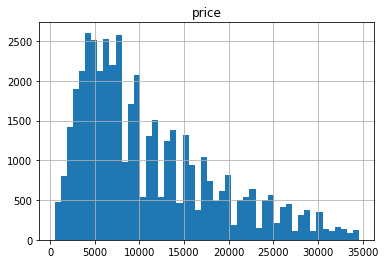

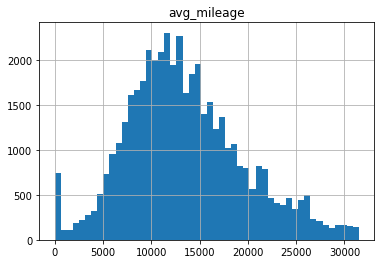

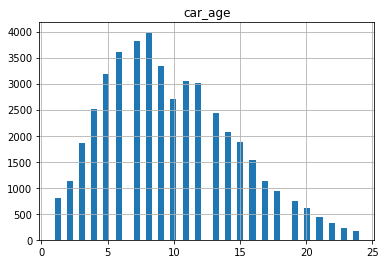

In [53]:
quantitative_value = ['price','avg_mileage','car_age']

for i in quantitative_value:
    df2.hist([i],bins=50)
    plt.show()

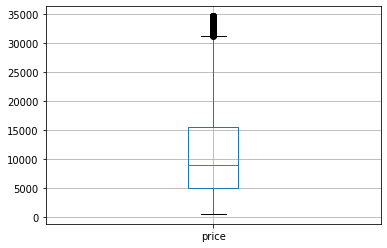

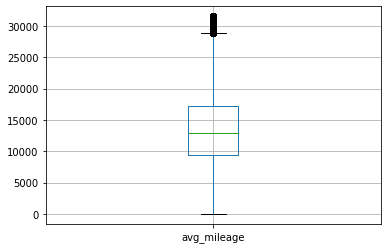

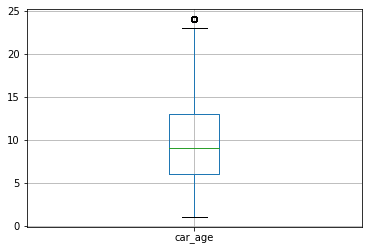

In [54]:
#boxplot 
quantitative_value = ['price','avg_mileage','car_age']

for i in quantitative_value:
    df2.boxplot([i])
    plt.show()

* Terdapat perbedaan yang cukup signifikan pada histogram dan boxplot yang diperoleh dari data dengan outlier dan data tanpa outlier. 

* Pada histogram `price` data sudah tidak berpusat di 0 

* Pada boxplot yang dihasilkan, outlier telah disingkirkan sehingga bentuk boxplot lebih terlihat dan rentang persebaran datanya lebih kecil.

## Masa Berlaku Iklan 
Sekarang kita akan mencari tahu berapa lama umumnya iklan ditayangkan (`days_listed`) dan menentukan kapan iklan dihapus dengan cepat, serta kapan iklan ditayangkan dalam waktu yang sangat lama.

In [55]:
df2['days_listed'].describe()

count    45486.000000
mean        39.551269
std         28.225571
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

<AxesSubplot:>

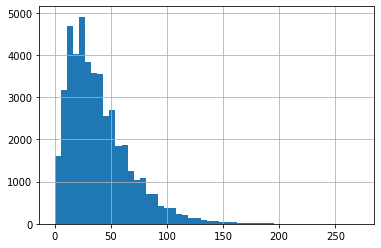

In [56]:
df2['days_listed'].hist(bins=50)

* Dari informasi di atas, diketahui bahwa rata-rata waktu penayangan iklan yaitu sekitar 40 hari dan sebagian besar dari iklan tersebut ditayangkan dalam waktu 33 hari

* Waktu terlama penayangan iklan yaitu 271 hari dan waktu tercepat yaitu 0 hari (langsung terjual saat iklan pertama kali ditayangkan).

## Harga Rata-Rata Setiap Jenis Kendaraan

Sekarang kita akan menganalisis jumlah iklan dan harga rata-rata untuk setiap jenis kendaraan. Kita akan membuat grafik yang menunjukkan ketergantungan jumlah iklan pada jenis kendaraan.

In [57]:
car_avg_price = df2.pivot_table(index= 'type', values= 'price', aggfunc= ['count','mean'])
car_avg_price.columns = ['total_ads','avg_price']
print(car_avg_price.sort_values('total_ads', ascending=False))
print(car_avg_price.sort_values('avg_price', ascending=False))

             total_ads     avg_price
type                                
SUV              11237  10425.873810
sedan            11194   6862.842237
truck            10370  14969.213115
pickup            6038  14494.623716
coupe             1859  13598.437870
wagon             1469   8808.944860
mini-van          1091   7665.290559
hatchback          961   6755.997919
van                528   8657.719697
convertible        323  13264.962848
other              217  10139.004608
offroad            178  14342.623596
bus                 21  18107.428571
             total_ads     avg_price
type                                
bus                 21  18107.428571
truck            10370  14969.213115
pickup            6038  14494.623716
offroad            178  14342.623596
coupe             1859  13598.437870
convertible        323  13264.962848
SUV              11237  10425.873810
other              217  10139.004608
wagon             1469   8808.944860
van                528   8657.719697
m

Text(0.5, 1.0, 'total_ads VS type')

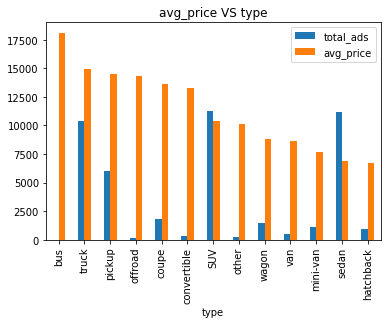

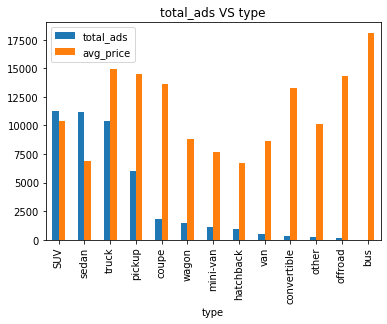

In [58]:
#Buatlah grafik yang menunjukkan ketergantungan jumlah iklan pada jenis kendaraan. 
car_avg_price.sort_values('avg_price', ascending=False).plot(kind='bar') 
plt.title("avg_price VS type")
car_avg_price.sort_values('total_ads', ascending=False).plot(kind='bar') 
plt.title("total_ads VS type")

* Iklan terbanyak yaitu tipe kendaraan SUV dengan harga rata-rata 10 ribu dollar dan sedan dengan harga 6800 dollar.

* Harga rata-rata tertinggi yaitu 18 ribu dollar yang merupakan tipe kendaraan bus dan truck dengan harga hampir mencapai 15 ribu dollar.

* Tipe kendaraan yang berukuran besar akan semakin tinggi harganya

## Faktor Harga

Kita akan menganalisis tipe kendaraan SUV dan sedan karena memiliki jumlah iklan terbanyak yang menandakan kedua tipe kendaraan tersebut cukup populer. Kita akan melihat apakah harganya bergantung pada usia, jarak tempuh, kondisi, tipe transmisi, dan warnanya.

In [59]:
#SUV
SUV = df2.query('type in "SUV"')
print(SUV.value_counts())

price  model_year  model              condition  cylinders  fuel  odometer  transmission  type  paint_color  is_4wd  date_posted  days_listed  day        month      year  car_age  avg_mileage 
500    1998        ford explorer      1          6.0        gas   223000.0  automatic     SUV   yellow       False   2018-09-18   25           Tuesday    September  2018  21       10619.047619    1
11995  2014        ford edge          2          6.0        gas   117841.0  automatic     SUV   silver       True    2018-05-21   20           Monday     May        2018  5        23568.200000    1
       2013        ford explorer      2          6.0        gas   140239.0  automatic     SUV   silver       True    2019-02-21   24           Thursday   February   2019  7        20034.142857    1
                   honda pilot        2          6.0        gas   118698.0  automatic     SUV   black        False   2018-06-23   27           Saturday   June       2018  6        19783.000000    1
               

In [60]:
for i in ['transmission','paint_color']:
    print(SUV[i].value_counts())
    print()

automatic    10689
manual         456
other           92
Name: transmission, dtype: int64

black     3945
white     1759
silver    1451
grey      1082
blue       954
red        839
green      419
brown      358
custom     272
orange      77
yellow      42
purple      39
Name: paint_color, dtype: int64



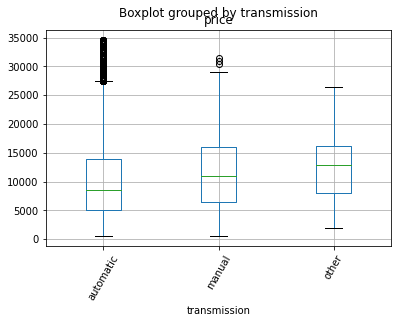

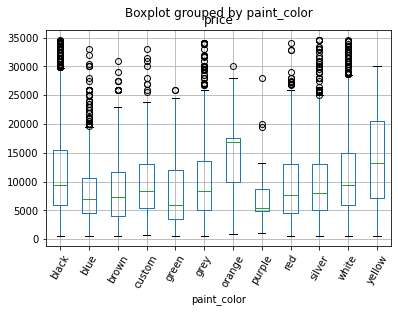

In [61]:
for i in ['transmission','paint_color']:
    SUV.boxplot(column='price', by=i)
    plt.xticks(rotation=60)
    plt.show()

* Mobil dengan tipe SUV berwarna hitam dan jenis transmisi otomatis merupakan kendaraan yang terpopuler

* Jika dilihat dari median dan rentang interkuartil (panjang boxplot), transmisi sepertinya tidak terlalu berpengaruh terhadap harga

* Warna mobil memiliki median yang cukup rata, yaitu antara 5000 - 10000 dollar, namun untuk warna terang seperti kuning dan oranye memiliki median yang sedikit lebih tinggi

In [62]:
for i in ['car_age','avg_mileage','condition']:
    print(SUV[i].value_counts())
    print()

8     974
12    921
7     880
11    877
9     847
6     808
10    780
5     728
4     584
13    570
15    487
14    466
16    432
3     379
17    305
2     261
18    203
19    170
20    148
1     148
21    108
22     70
23     56
24     35
Name: car_age, dtype: int64

13028.750000    82
17371.666667    78
9475.454545     75
8685.833333     73
10423.000000    70
                ..
18799.000000     1
3806.166667      1
12831.470588     1
7713.181818      1
11301.000000     1
Name: avg_mileage, Length: 6399, dtype: int64

3    5825
2    4087
4     997
1     296
0      17
5      15
Name: condition, dtype: int64



* Mobil SUV berusia 8 tahun cukup diminati banyak orang

* Jarak tempuh yang paling diminati untuk mobil jenis SUV yaitu 13028 mile/year

* Kondisi yang paling banyak diminati yaitu 3 (excellent) dan 2 (good)

<AxesSubplot:xlabel='price', ylabel='car_age'>

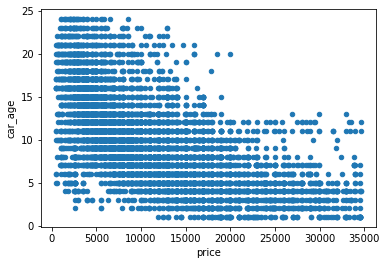

In [63]:
SUV.plot(x='price', y='car_age', kind='scatter') 

<AxesSubplot:xlabel='price', ylabel='car_age'>

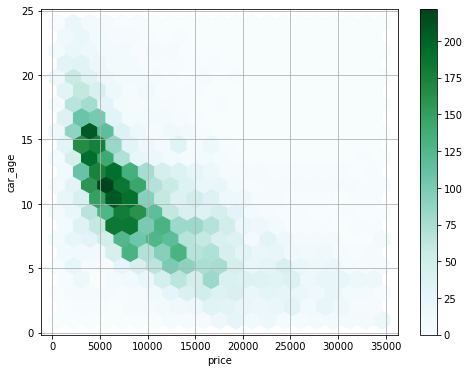

In [68]:
SUV.plot(x='price', y='car_age', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True)

<AxesSubplot:xlabel='price', ylabel='avg_mileage'>

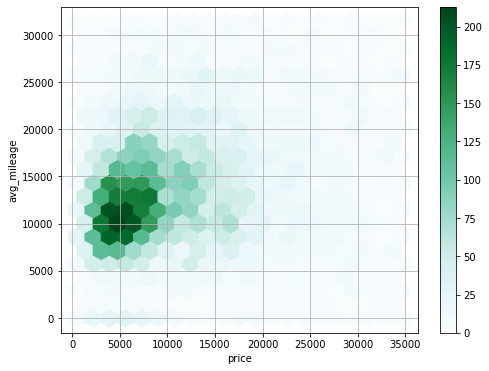

In [64]:
SUV.plot(x='price', y='avg_mileage', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True)

<AxesSubplot:xlabel='price', ylabel='condition'>

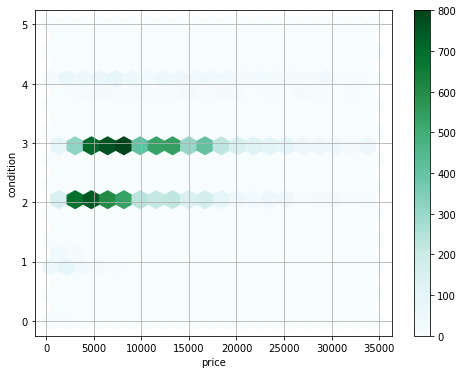

In [65]:
SUV.plot(x='price', y='condition', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True)


In [67]:
#memeriksa korelasi
for i in ['car_age','avg_mileage','condition']:
    print(SUV['price'].corr(SUV[i]))
    print()

-0.6456274140748917

0.18800961640740077

0.29589482804184897



* Berdasarkan perhitungan metode korelasi koefisien pearson, harga mobil memiliki ketergantungan terhadap usia nya. Semakin tua usia mobil maka akan semakin murah harganya ditunjukkan dengan adanya korelasi negatif
 
* Usia mobil SUV yang paling banyak diminati yaitu 6 - 15 tahun dengan kisaran harga 2500 - 10000 dollar

* Korelasi antara harga dan jarak tempuh `avg_mileage` cukup lemah walaupun bernilai positif

* Terdapat korelasi positif namun cukup lemah antara keadaan kendaraan dengan harga yaitu jika kondisinya bagus maka harga juga makin mahal, terlihat dari kondisi 3 (excellent) yang memiliki rentang harga 5000 - 15000 dollar dan kondisi 2 (good) memiliki rentang harga 5000 - 10000 dollar. Namun, perbedaannya tidak terlalu signifikan.

In [70]:
#Sedan
sedan = df2.query('type in "sedan"')
print(sedan.value_counts())

price  model_year  model             condition  cylinders  fuel    odometer  transmission  type   paint_color  is_4wd  date_posted  days_listed  day       month      year  car_age  avg_mileage 
500    1996        honda accord      1          4.0        gas     281338.0  automatic     sedan  silver       False   2018-06-23   32           Saturday  June       2018  23       12232.086957    1
7800   2013        volkswagen jetta  3          4.0        diesel  78000.0   automatic     sedan  black        False   2018-09-03   20           Monday    September  2018  6        13000.000000    1
       2010        toyota corolla    3          4.0        gas     96201.0   automatic     sedan  silver       False   2019-04-15   22           Monday    April      2019  10       9620.100000     1
       2011        honda civic       3          4.0        gas     71322.0   automatic     sedan  silver       False   2018-07-29   34           Sunday    July       2018  8        8915.250000     1
          

In [72]:
for i in ['transmission','paint_color']:
    print(sedan[i].value_counts())
    print()

automatic    10567
manual         559
other           68
Name: transmission, dtype: int64

silver    3910
black     1619
grey      1517
white     1358
blue      1159
red        877
custom     253
brown      248
green      198
purple      26
yellow      20
orange       9
Name: paint_color, dtype: int64



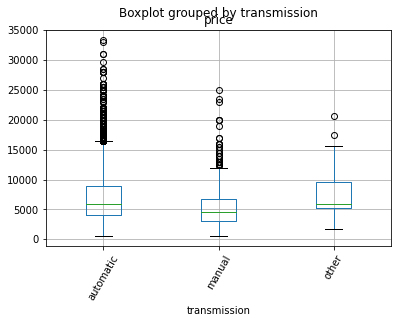

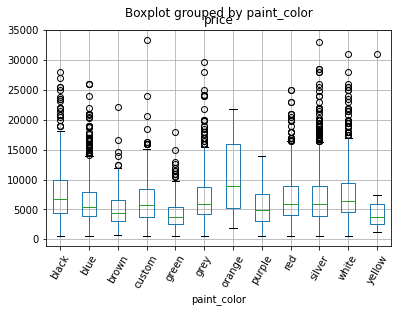

In [74]:
for i in ['transmission','paint_color']:
    sedan.boxplot(column='price', by=i)
    plt.xticks(rotation=60)
    plt.show()

* Mobil dengan tipe sedan berwarna silver dan jenis transmisi otomatis merupakan kendaraan yang terpopuler

* Jika dilihat dari median dan rentang interkuartil (panjang boxplot), transmisi sepertinya tidak terlalu berpengaruh terhadap harga

* Mobil sedan memiliki median antara 5000 - 10000 pada hampir setiap warnanyanya. Namun, kali ini pada mobil berwarna yang cerah seperti kuning memiliki median di bawah 5000 dollar, sedangkan mobil oranye memiliki median hampir 10000 dollar

In [75]:
for i in ['car_age','avg_mileage','condition']:
    print(sedan[i].value_counts())
    print()

7     1305
6     1147
5      936
8      909
9      808
10     807
12     692
11     685
4      668
13     566
3      535
14     422
15     320
2      317
16     270
17     205
18     153
1      146
19     107
20      80
21      49
22      28
23      22
24      17
Name: car_age, dtype: int64

14890.000000    107
17371.666667     95
20846.000000     90
21500.000000     83
13028.750000     77
               ... 
12478.300000      1
18171.571429      1
10269.333333      1
12515.000000      1
7892.307692       1
Name: avg_mileage, Length: 6079, dtype: int64

3    5562
2    4093
4    1182
1     279
0      39
5      39
Name: condition, dtype: int64



* Mobil sedan berusia 7 tahun cukup diminati banyak orang

* Jarak tempuh yang paling diminati untuk mobil jenis sedan yaitu 14890 mile/year

* Kondisi yang paling banyak diminati yaitu 3 (excellent) dan 2 (good)

<AxesSubplot:xlabel='price', ylabel='car_age'>

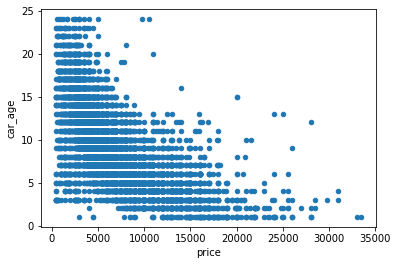

In [76]:
sedan.plot(x='price', y='car_age', kind='scatter') 

<AxesSubplot:xlabel='price', ylabel='car_age'>

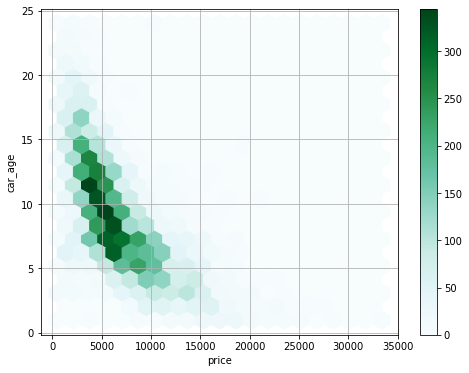

In [81]:
sedan.plot(x='price', y='car_age', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True)

<AxesSubplot:xlabel='price', ylabel='avg_mileage'>

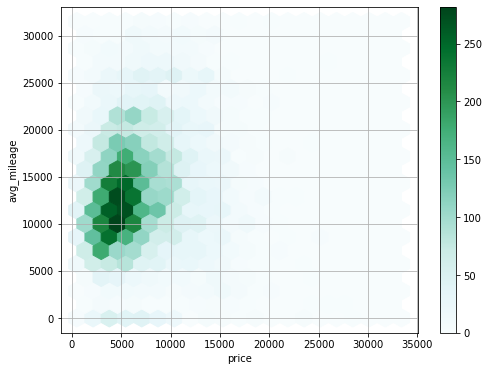

In [78]:
sedan.plot(x='price', y='avg_mileage', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True)

<AxesSubplot:xlabel='price', ylabel='condition'>

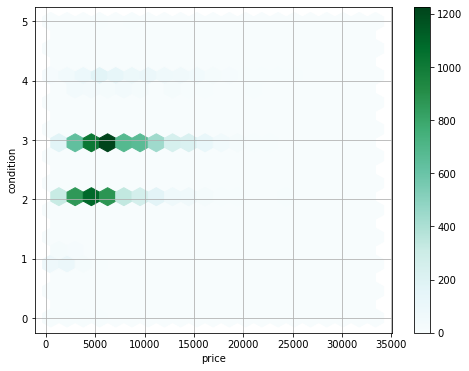

In [79]:
sedan.plot(x='price', y='condition', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True)


In [80]:
#memeriksa korelasi
for i in ['car_age','avg_mileage','condition']:
    print(sedan['price'].corr(sedan[i]))
    print()

-0.6674992577637183

0.10574336519544976

0.32865091660978374



* Semakin tua usia mobil maka akan semakin murah harganya ditunjukkan dengan adanya korelasi negatif

* Usia mobil sedan yang paling banyak diminati yaitu 5 - 15 tahun dengan kisaran harga 3000 - 10000 dollar

* Terdapat korelasi positif antara harga dan jarak tempuh `avg_mileage` yang cukup lemah

* Terdapat korelasi positif namun cukup lemah antara keadaan kendaraan dengan harga yaitu jika kondisinya bagus maka harga juga makin mahal, terlihat dari kondisi 3 (excellent) yang memiliki rentang harga 2500 - 10000 dollar dan kondisi 2 (good) memiliki rentang harga 2500 - 7500 dollar. Namun, perbedaannya tidak terlalu signifikan.

# Kesimpulan Umum

* Tidak ada nilai duplikat pada dataset.

* Terdapat nilai yang hilang di kolom `model_year`, `cylinders`, `odometer`, `paint_color`, dan `is_4wd`. Nilai yang hilang ini nantinya akan diisi dengan median atau mean.

* Beberapa kolom seperti `model_year`, `date_posted`, `is_4wd`, dan `condition` harus diubah tipe datanya untuk memudahkan pemrosesan data

* Dua tipe mobil yang terpopuler yaitu SUV dan sedan

* Ukuran kendaraan juga berpengaruh terhadap harganya, semakin besar ukurannya maka akan mahal.

* **Semakin tua usia mobil** maka akan **semakin murah harganya**, hal ini berlaku untuk kedua tipe mobil. 

* Keadaan, transmisi, warna, jarak tempuh kendaraan tidak memberikan pengaruh begitu besar terhadap harganya
